# Data Cleaning Notebook

This notebook systematically clean the chaos owid carbon dataset into reusable.


In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('../data/raw/owid-co2-data.csv')

In [2]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [3]:
df_info = {
    "shape": df.shape,
    "missing_values_percentage": df.isna().mean().sort_values(ascending=False).head(40)
}

In [4]:
df_info

{'shape': (50191, 79),
 'missing_values_percentage': share_global_cumulative_other_co2      0.958000
 share_global_other_co2                 0.958000
 other_co2_per_capita                   0.950708
 other_industry_co2                     0.936204
 cumulative_other_co2                   0.936204
 consumption_co2_per_gdp                0.911458
 consumption_co2_per_capita             0.910303
 trade_co2                              0.909645
 trade_co2_share                        0.909645
 consumption_co2                        0.903050
 energy_per_gdp                         0.846666
 co2_including_luc_per_unit_energy      0.806718
 energy_per_capita                      0.798589
 primary_energy_consumption             0.797753
 co2_per_unit_energy                    0.793788
 share_global_cumulative_flaring_co2    0.783447
 share_global_flaring_co2               0.783447
 flaring_co2_per_capita                 0.707238
 share_global_cumulative_gas_co2        0.700464
 share_global_gas

In [5]:
missing_by_year = df[df.columns[3:]].isna().groupby(df['year']).mean()

In [6]:
missing_by_year

,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,,,,,,,,,,,,,,,,,,,,,
1750,0.155172,1.000000,0.103448,0.189655,0.758621,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1751,1.000000,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1752,1.000000,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1753,1.000000,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1754,1.000000,1.000000,0.103448,1.000000,0.758621,0.758621,0.896552,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.098039,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824
2020,0.098039,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824
2021,0.098039,0.352941,0.101961,0.113725,0.031373,0.078431,0.086275,0.172549,0.172549,0.172549,...,0.756863,0.070588,0.137255,0.070588,0.070588,0.137255,0.156863,0.160784,0.458824,0.458824


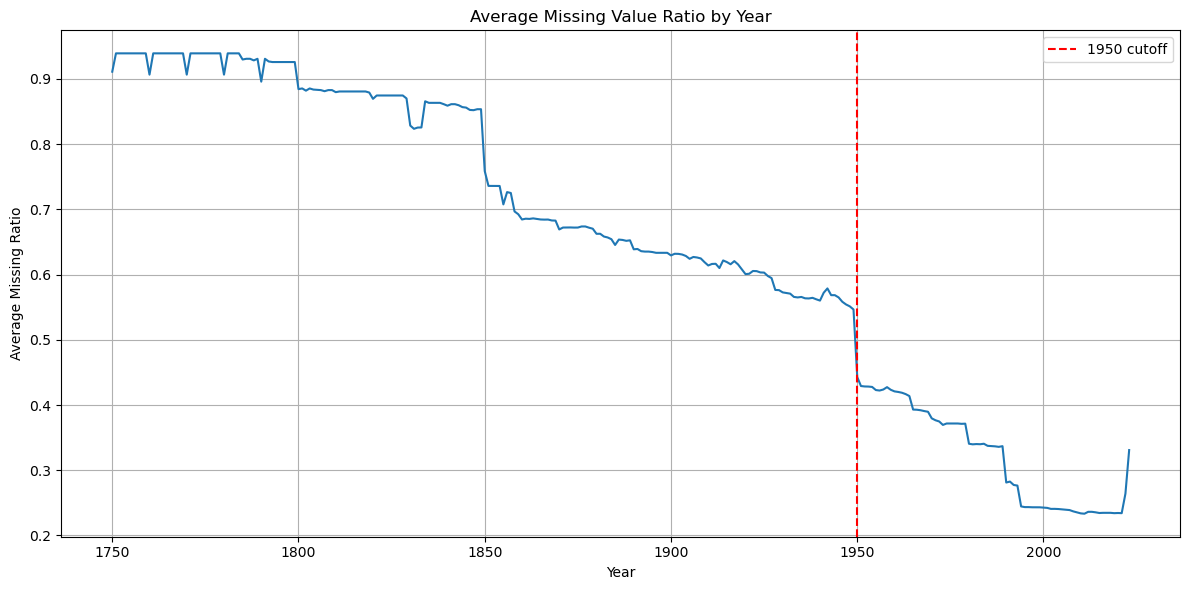

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(missing_by_year.index, missing_by_year.mean(axis=1))
plt.axvline(1950, color='red', linestyle='--', label='1950 cutoff')
plt.title('Average Missing Value Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Missing Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- According to the analysis above most of the data are missing and it is useless before 1950
- So that I cut off the data from 1950 onwards

In [8]:
# Filter dataset to only include years from 1950 onwards
df_post_1950 = df[df["year"] >= 1950].reset_index(drop=True)

# Recalculate missing value percentage after filtering
missing_post_1950 = df_post_1950.isna().mean().sort_values(ascending=False)

# Identify columns to drop (more than 50% missing after 1950)
cols_to_drop = missing_post_1950[missing_post_1950 > 0.5].index.tolist()

df = df_post_1950.drop(columns=cols_to_drop)

In [9]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_flaring_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
0,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.000,0.000,0.084,0.070,475.000,...,NaN,0.117,0.004,0.128,0.000,0.000,0.001,0.0,19.447,1.453
1,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.000,0.000,0.092,0.007,8.696,...,NaN,0.125,0.004,0.128,0.000,0.000,0.001,0.0,20.458,1.473
2,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.000,0.000,0.092,0.000,0.000,...,NaN,0.140,0.003,0.128,0.000,0.000,0.001,0.0,21.356,1.484
3,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.000,0.000,0.106,0.015,16.000,...,NaN,0.154,0.004,0.128,0.000,0.000,0.001,0.0,22.361,1.517
4,Afghanistan,1954,AFG,8207953.0,1.086636e+10,0.000,0.000,0.106,0.000,0.000,...,NaN,0.158,0.003,0.128,0.000,0.000,0.001,0.0,23.256,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,0.0,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
18760,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,0.0,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
18761,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,0.0,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
18762,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,0.0,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [10]:
selected_columns = [
    'year',
    'iso_code',
    'population',
    'gdp',
    'primary_energy_consumption',
    'oil_co2',
    'coal_co2',
    'total_ghg',
    'co2_including_luc',
    'temperature_change_from_ghg',
    'co2'
]
df_selected = df[selected_columns + ['country']] 

In [11]:
filtered_df = df_selected[df_selected['iso_code'].str.len() ==3].drop(columns='iso_code')

filtered_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,NaN,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,NaN,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,NaN,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,NaN,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,NaN,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,46.120,3.778,6.013,34.348,19.807,0.002,10.263,Zimbabwe
18760,2020,15526888.0,2.317871e+10,41.997,3.063,4.935,31.323,17.430,0.002,8.495,Zimbabwe
18761,2021,15797220.0,2.514009e+10,42.145,3.735,5.938,33.549,18.752,0.002,10.204,Zimbabwe
18762,2022,16069061.0,2.590159e+10,NaN,3.379,6.516,33.772,18.447,0.002,10.425,Zimbabwe


In [12]:
len(filtered_df.country.unique())

218

In [13]:
(filtered_df.year.min(), filtered_df.year.max())

(1950, 2023)

In [14]:
filtered_df.isna().sum()

year                              0
population                      148
gdp                            4675
primary_energy_consumption     6686
oil_co2                        1177
coal_co2                       5767
total_ghg                      1628
co2_including_luc              2381
temperature_change_from_ghg     222
co2                            1077
country                           0
dtype: int64

In [15]:
missing_percentage = filtered_df.isna().sum() / len(filtered_df) * 100

missing_percentage.round(2)

year                            0.00
population                      0.92
gdp                            28.98
primary_energy_consumption     41.45
oil_co2                         7.30
coal_co2                       35.75
total_ghg                      10.09
co2_including_luc              14.76
temperature_change_from_ghg     1.38
co2                             6.68
country                         0.00
dtype: float64

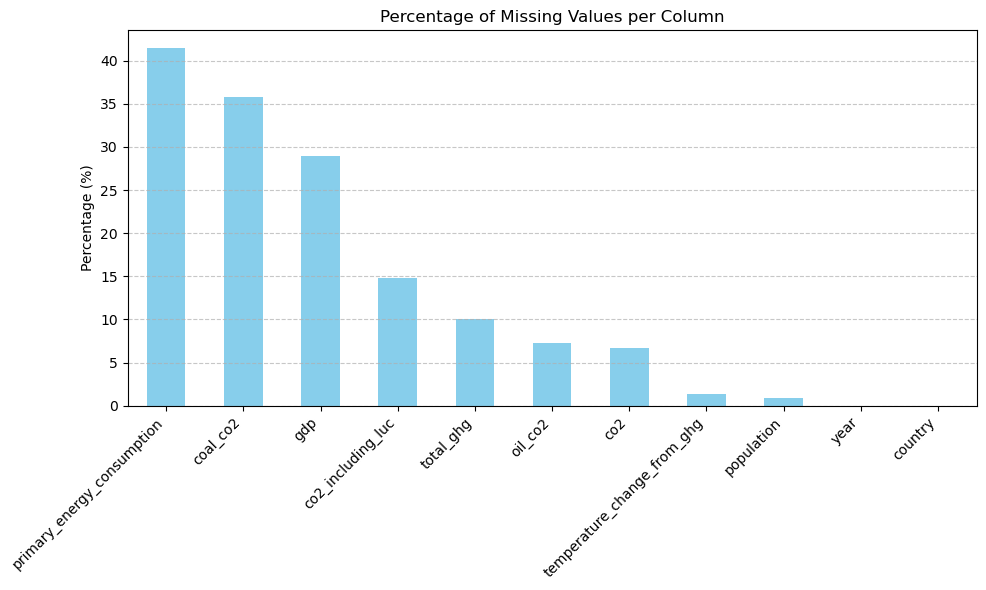

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
numeric_cols = [
    'population', 'gdp', 'primary_energy_consumption', 'oil_co2', 'coal_co2',
    'total_ghg', 'co2_including_luc', 'temperature_change_from_ghg', 'co2'
]

filtered_df = filtered_df.sort_values(by=['country', 'year'])

# Forward fill then backward fill within each country
filtered_df[numeric_cols] = filtered_df.groupby('country')[numeric_cols].ffill().bfill()


In [18]:
filtered_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,7.791,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,7.791,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,7.791,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,7.791,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,7.791,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,46.120,3.778,6.013,34.348,19.807,0.002,10.263,Zimbabwe
18760,2020,15526888.0,2.317871e+10,41.997,3.063,4.935,31.323,17.430,0.002,8.495,Zimbabwe
18761,2021,15797220.0,2.514009e+10,42.145,3.735,5.938,33.549,18.752,0.002,10.204,Zimbabwe
18762,2022,16069061.0,2.590159e+10,42.145,3.379,6.516,33.772,18.447,0.002,10.425,Zimbabwe


In [19]:
print(filtered_df[numeric_cols].isna().sum())


population                     0
gdp                            0
primary_energy_consumption     0
oil_co2                        0
coal_co2                       0
total_ghg                      0
co2_including_luc              0
temperature_change_from_ghg    0
co2                            0
dtype: int64


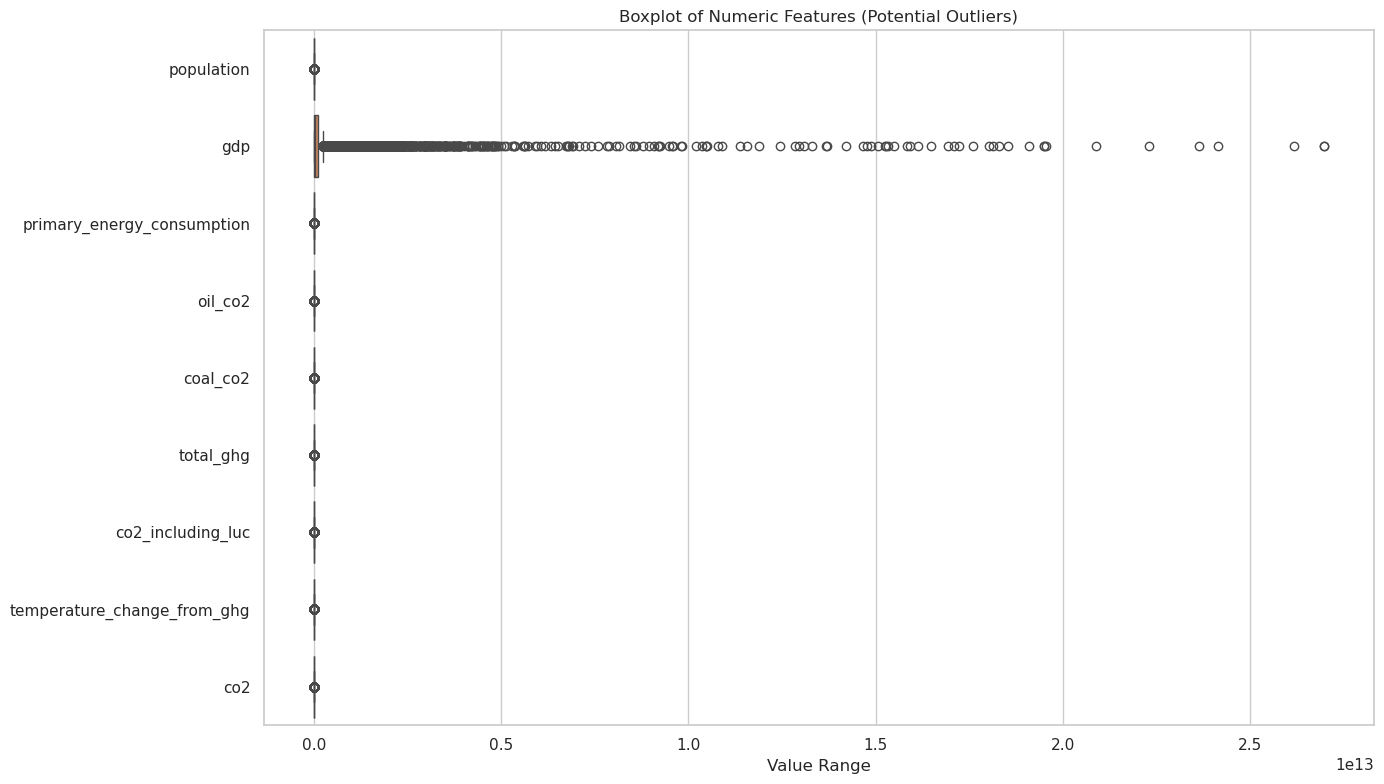

In [20]:
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")

# Select numeric columns for visualization
numeric_cols = [
    'population', 'gdp', 'primary_energy_consumption', 'oil_co2', 'coal_co2',
    'total_ghg', 'co2_including_luc', 'temperature_change_from_ghg', 'co2'
]

# Create boxplots to inspect outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df[numeric_cols], orient="h")
plt.title("Boxplot of Numeric Features (Potential Outliers)")
plt.xlabel("Value Range")
plt.tight_layout()
plt.show()

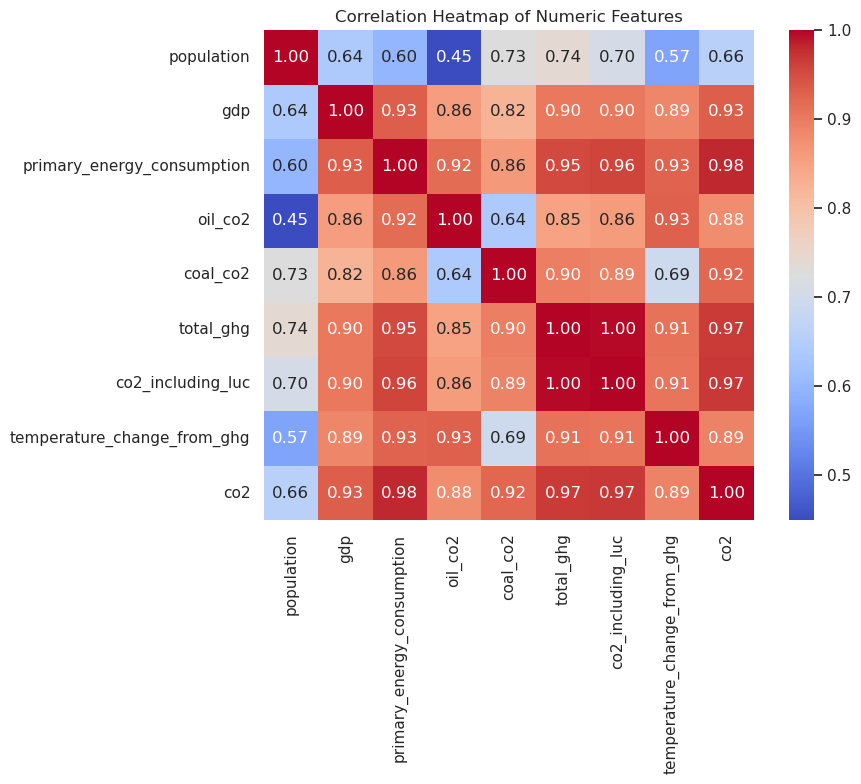

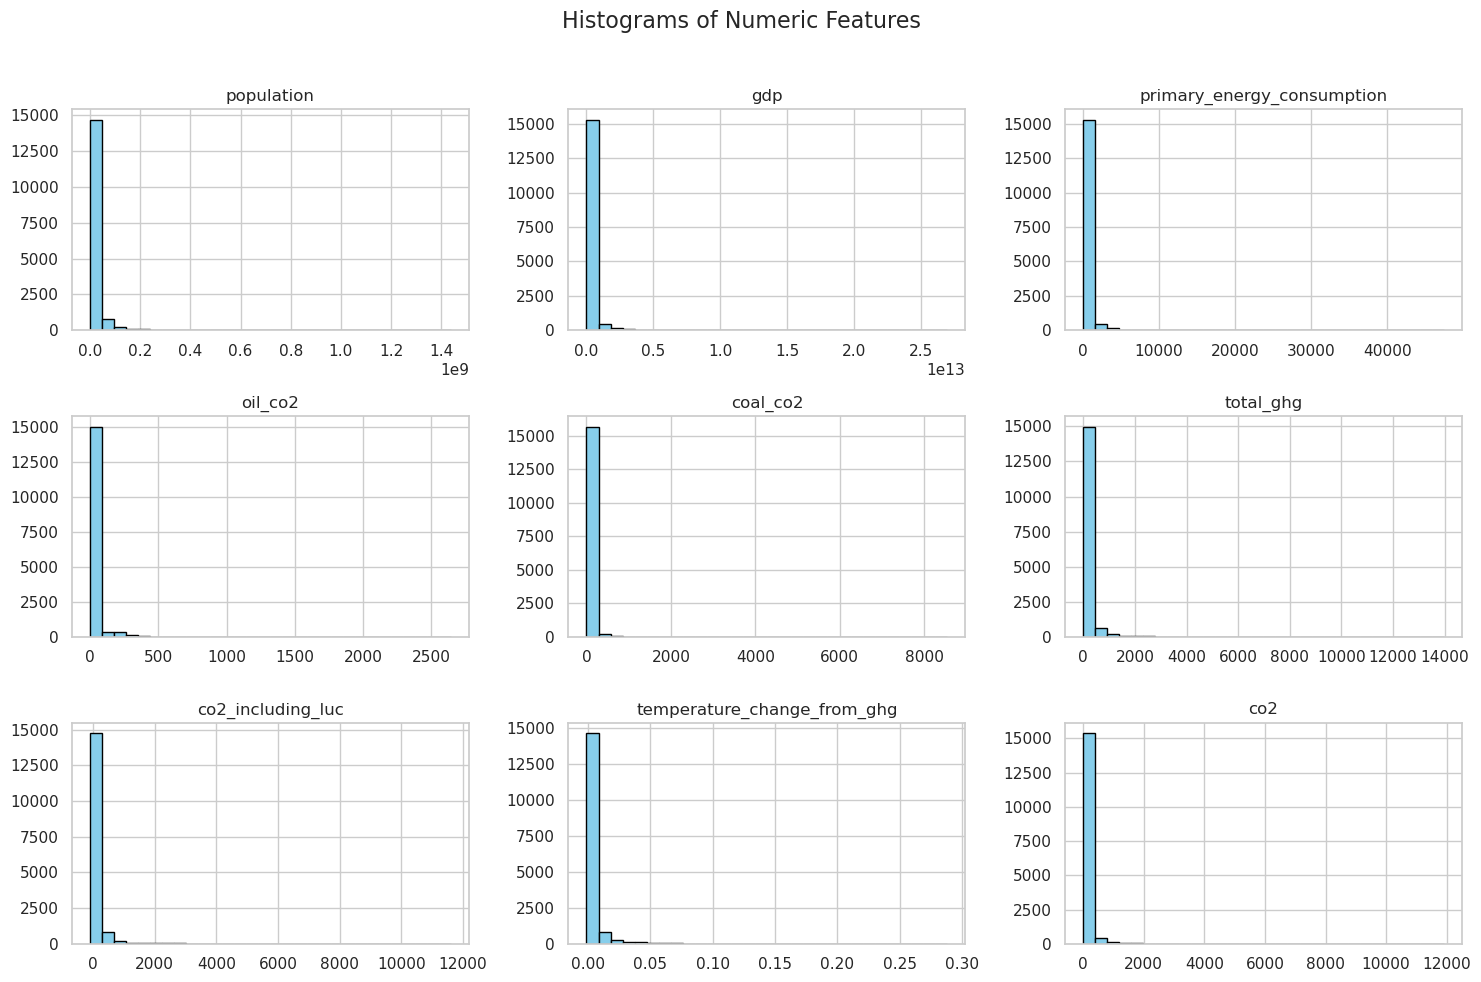

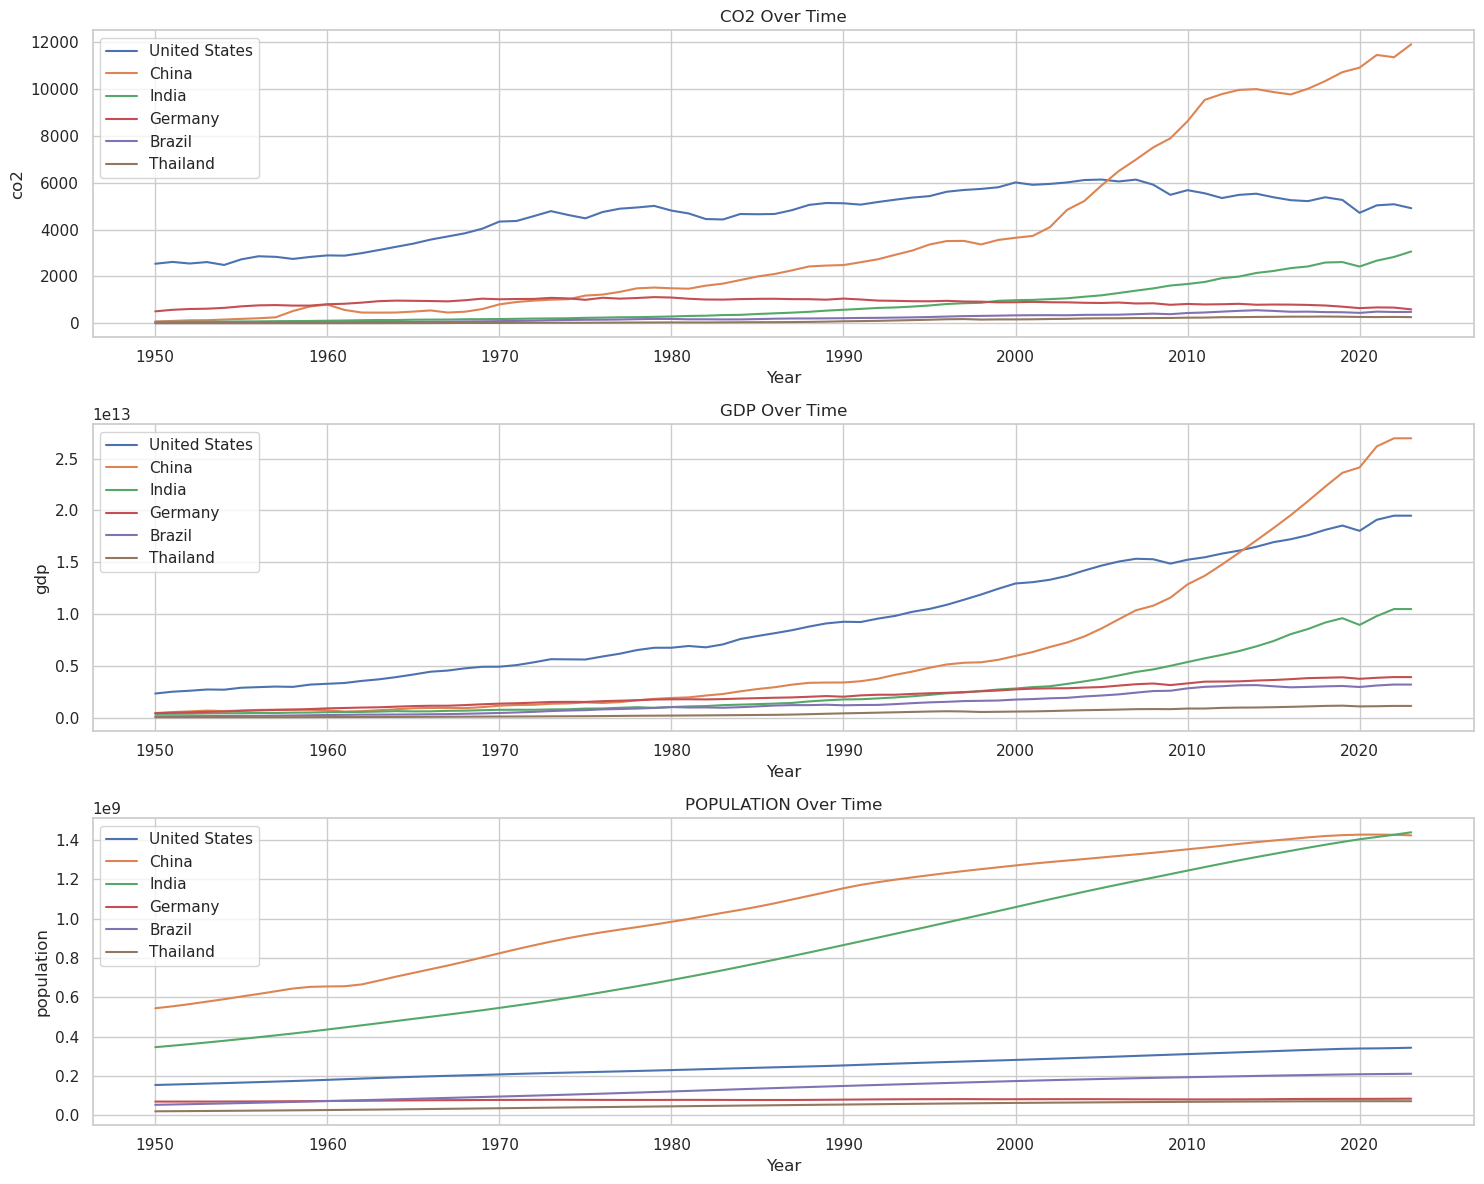

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = filtered_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# Histograms for each numeric feature
filtered_df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Time Series Trends for Selected Countries
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil', 'Thailand']
features_to_plot = ['co2', 'gdp', 'population']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 1, i)
    for country in selected_countries:
        country_data = filtered_df[filtered_df['country'] == country]
        plt.plot(country_data['year'], country_data[feature], label=country)
    plt.title(f"{feature.upper()} Over Time")
    plt.xlabel("Year")
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
test_df = filtered_df[filtered_df['country'] == "Thailand"]

test_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
16840,1950,20428403.0,2.609420e+10,30.707,0.828,0.044,178.956,223.872,0.003,0.956,Thailand
16841,1951,20965189.0,2.794396e+10,30.707,0.890,0.048,181.572,224.330,0.003,1.091,Thailand
16842,1952,21527581.0,2.948582e+10,30.707,1.100,0.055,187.429,232.290,0.003,1.278,Thailand
16843,1953,22109322.0,3.272660e+10,30.707,1.403,0.099,192.819,236.698,0.004,1.644,Thailand
16844,1954,22713342.0,3.246220e+10,30.707,1.655,0.206,197.743,243.131,0.004,2.050,Thailand
...,...,...,...,...,...,...,...,...,...,...,...
16909,2019,71522265.0,1.149131e+12,1479.745,103.652,70.060,435.538,319.123,0.015,281.877,Thailand
16910,2020,71641484.0,1.078333e+12,1375.758,96.312,74.799,425.391,307.369,0.015,271.923,Thailand
16911,2021,71727340.0,1.095187e+12,1386.810,90.920,76.648,421.067,301.862,0.015,267.142,Thailand
16912,2022,71735320.0,1.124144e+12,1387.893,105.828,69.809,426.320,306.364,0.015,272.573,Thailand


In [23]:
asean_countries = [
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", 
    "Myanmar", "Philippines", "Singapore", "Vietnam"
]

asean_df = filtered_df[filtered_df['country'].isin(asean_countries)]

asean_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
2590,1950,48315.0,1.908332e+10,24.127,0.154,0.000,0.921,1.086,0.000,0.414,Brunei
2591,1951,51211.0,1.908332e+10,24.127,0.033,0.000,0.661,0.852,0.000,0.300,Brunei
2592,1952,54252.0,1.908332e+10,24.127,0.051,0.000,0.913,1.115,0.000,0.322,Brunei
2593,1953,57582.0,1.908332e+10,24.127,0.077,0.000,1.045,1.252,0.000,0.344,Brunei
2594,1954,61226.0,1.908332e+10,24.127,0.085,0.000,1.219,1.429,0.000,0.359,Brunei
...,...,...,...,...,...,...,...,...,...,...,...
18389,2019,97173778.0,7.316531e+11,1202.636,70.808,191.443,543.980,442.503,0.010,339.147,Vietnam
18390,2020,98079196.0,7.526296e+11,1204.393,68.389,215.817,560.892,460.607,0.011,362.460,Vietnam
18391,2021,98935101.0,7.719120e+11,1208.554,64.076,172.395,517.077,413.404,0.011,313.973,Vietnam
18392,2022,99680656.0,8.338038e+11,1244.068,67.727,157.181,500.590,395.764,0.011,297.634,Vietnam


In [24]:
global_df = filtered_df[~filtered_df['country'].isin(asean_countries + ["Thailand"])]

global_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,7.791,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,7.791,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,7.791,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,7.791,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,7.791,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
18759,2019,15271377.0,2.514642e+10,46.120,3.778,6.013,34.348,19.807,0.002,10.263,Zimbabwe
18760,2020,15526888.0,2.317871e+10,41.997,3.063,4.935,31.323,17.430,0.002,8.495,Zimbabwe
18761,2021,15797220.0,2.514009e+10,42.145,3.735,5.938,33.549,18.752,0.002,10.204,Zimbabwe
18762,2022,16069061.0,2.590159e+10,42.145,3.379,6.516,33.772,18.447,0.002,10.425,Zimbabwe


In [25]:
from sklearn.model_selection import train_test_split

asean_train_df, asean_val_df = train_test_split(
    asean_df, 
    test_size=0.4, 
    random_state=42, 
    stratify=asean_df['country']
)

In [26]:
train_df = pd.concat([global_df, asean_train_df], ignore_index=True)
train_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,7776182.0,9.421400e+09,7.791,0.063,0.021,19.447,7.316,0.001,0.084,Afghanistan
1,1951,7879343.0,9.692280e+09,7.791,0.066,0.026,20.458,8.264,0.001,0.092,Afghanistan
2,1952,7987783.0,1.001733e+10,7.791,0.060,0.032,21.356,9.192,0.001,0.092,Afghanistan
3,1953,8096703.0,1.063052e+10,7.791,0.068,0.038,22.361,10.269,0.001,0.106,Afghanistan
4,1954,8207953.0,1.086636e+10,7.791,0.064,0.043,23.256,11.137,0.001,0.106,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...
15786,2016,94000115.0,5.930066e+11,898.778,55.369,106.855,468.074,377.657,0.010,220.980,Vietnam
15787,1980,186121.0,1.908332e+10,24.127,0.674,0.004,13.729,7.888,0.000,6.877,Brunei
15788,1983,3541005.0,4.484085e+09,3.154,0.180,0.000,22.252,18.777,0.001,0.180,Laos
15789,1985,218928.0,1.908332e+10,22.553,1.224,0.000,8.940,4.440,0.000,2.594,Brunei


In [27]:
val_df = asean_val_df.reset_index(drop=True)
val_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1962,1721183.0,6.607005e+09,47.888,2.484,0.029,5.489,2.299,0.000,2.513,Singapore
1,1971,137930.0,1.908332e+10,24.127,0.260,0.000,9.059,7.841,0.000,7.511,Brunei
2,1971,27807214.0,2.893165e+10,20.251,3.931,0.601,229.144,256.479,0.006,5.099,Myanmar
3,2009,384964.0,1.908332e+10,37.245,1.754,0.000,16.477,9.403,0.000,7.745,Brunei
4,2007,48125046.0,1.741234e+11,79.877,5.564,0.821,274.135,190.474,0.009,12.841,Myanmar
...,...,...,...,...,...,...,...,...,...,...,...
262,2022,455374.0,1.908332e+10,45.994,3.309,2.857,17.095,12.090,0.000,11.354,Brunei
263,1977,169287.0,1.908332e+10,24.127,0.444,0.000,12.287,7.190,0.000,6.390,Brunei
264,1993,193305171.0,9.127027e+11,763.843,112.763,21.310,1257.568,658.467,0.030,215.109,Indonesia
265,1986,56645081.0,1.870868e+11,137.340,24.487,2.931,221.627,98.082,0.007,29.025,Philippines


In [28]:
test_df = test_df.reset_index(drop=True)
test_df

,year,population,gdp,primary_energy_consumption,oil_co2,coal_co2,total_ghg,co2_including_luc,temperature_change_from_ghg,co2,country
0,1950,20428403.0,2.609420e+10,30.707,0.828,0.044,178.956,223.872,0.003,0.956,Thailand
1,1951,20965189.0,2.794396e+10,30.707,0.890,0.048,181.572,224.330,0.003,1.091,Thailand
2,1952,21527581.0,2.948582e+10,30.707,1.100,0.055,187.429,232.290,0.003,1.278,Thailand
3,1953,22109322.0,3.272660e+10,30.707,1.403,0.099,192.819,236.698,0.004,1.644,Thailand
4,1954,22713342.0,3.246220e+10,30.707,1.655,0.206,197.743,243.131,0.004,2.050,Thailand
...,...,...,...,...,...,...,...,...,...,...,...
69,2019,71522265.0,1.149131e+12,1479.745,103.652,70.060,435.538,319.123,0.015,281.877,Thailand
70,2020,71641484.0,1.078333e+12,1375.758,96.312,74.799,425.391,307.369,0.015,271.923,Thailand
71,2021,71727340.0,1.095187e+12,1386.810,90.920,76.648,421.067,301.862,0.015,267.142,Thailand
72,2022,71735320.0,1.124144e+12,1387.893,105.828,69.809,426.320,306.364,0.015,272.573,Thailand


In [29]:
train_df.to_csv('../data/processed/train.csv')
test_df.to_csv('../data/processed/test.csv')
val_df.to_csv('../data/processed/val.csv')

In [30]:
# from sklearn.preprocessing import MinMaxScaler

# # Select numeric columns to scale
# features_to_scale = [
#     'population', 'gdp', 'primary_energy_consumption',
#     'oil_co2', 'coal_co2', 'total_ghg',
#     'co2_including_luc', 'temperature_change_from_ghg', 'co2'
# ]

# scaler = MinMaxScaler()

# train_scaled = train_df.copy()
# train_scaled[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

# val_scaled = val_df.copy()
# val_scaled[features_to_scale] = scaler.transform(val_df[features_to_scale])

# test_scaled = test_df.copy()
# test_scaled[features_to_scale] = scaler.transform(test_df[features_to_scale])


In [31]:
# Separate features and target
feature_cols = [
    'population', 'gdp', 'primary_energy_consumption',
    'oil_co2', 'coal_co2', 'total_ghg',
    'co2_including_luc', 'temperature_change_from_ghg'
]
target_col = ['co2']


In [32]:
from sklearn.preprocessing import MinMaxScaler

# === Feature scaler ===
feature_scaler = MinMaxScaler()
train_features_scaled = feature_scaler.fit_transform(train_df[feature_cols])
val_features_scaled = feature_scaler.transform(val_df[feature_cols])
test_features_scaled = feature_scaler.transform(test_df[feature_cols])

# === Target scaler ===
target_scaler = MinMaxScaler()
train_target_scaled = target_scaler.fit_transform(train_df[target_col])
val_target_scaled = target_scaler.transform(val_df[target_col])
test_target_scaled = target_scaler.transform(test_df[target_col])


In [33]:
# train_scaled

In [34]:
# Reconstruct scaled dataframes for modeling
train_scaled = pd.DataFrame(train_features_scaled, columns=feature_cols)
train_scaled['co2'] = train_target_scaled

val_scaled = pd.DataFrame(val_features_scaled, columns=feature_cols)
val_scaled['co2'] = val_target_scaled

test_scaled = pd.DataFrame(test_features_scaled, columns=feature_cols)
test_scaled['co2'] = test_target_scaled

In [35]:
feature_cols = [
    'population', 'gdp', 'primary_energy_consumption',
    'oil_co2', 'coal_co2', 'total_ghg',
    'co2_including_luc', 'temperature_change_from_ghg'
]

X_train = train_scaled[feature_cols]
y_train = train_scaled['co2']

X_val = val_scaled[feature_cols]
y_val = val_scaled['co2']

X_test = test_scaled[feature_cols]

In [36]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_val_pred_scaled = xgb_model.predict(X_val)
y_test_pred_scaled = xgb_model.predict(X_test)


/home/koala/miniconda3/envs/ml-dl/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [37]:
# Fit CO2-only scaler on original unscaled train_df
co2_scaler = MinMaxScaler()
co2_scaler.fit(train_df[['co2']])  # NOTE: unscaled version!


MinMaxScaler()

In [38]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Inverse-transform using same scaler
# y_val_real = scaler.inverse_transform(
#     np.hstack([val_scaled[feature_cols], y_val.values.reshape(-1, 1)])
# )[:, -1]

# y_val_pred_real = scaler.inverse_transform(
#     np.hstack([val_scaled[feature_cols], y_val_pred_scaled.reshape(-1, 1)])
# )[:, -1]

# y_test_real = scaler.inverse_transform(
#     np.hstack([test_scaled[feature_cols], test_scaled['co2'].values.reshape(-1, 1)])
# )[:, -1]

# y_test_pred_real = scaler.inverse_transform(
#     np.hstack([test_scaled[feature_cols], y_test_pred_scaled.reshape(-1, 1)])
# )[:, -1]


In [39]:
# Inverse scaled true and predicted CO₂
y_val_real = co2_scaler.inverse_transform(y_val.values.reshape(-1, 1))
y_val_pred_real = co2_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))

y_test_real = co2_scaler.inverse_transform(test_scaled['co2'].values.reshape(-1, 1))
y_test_pred_real = co2_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Validation
val_mae = mean_absolute_error(y_val_real, y_val_pred_real)
val_rmse = np.sqrt(mean_squared_error(y_val_real, y_val_pred_real))
val_r2 = r2_score(y_val_real, y_val_pred_real)

# Test
test_mae = mean_absolute_error(y_test_real, y_test_pred_real)
test_rmse = np.sqrt(mean_squared_error(y_test_real, y_test_pred_real))
test_r2 = r2_score(y_test_real, y_test_pred_real)

print("Validation Set:")
print(f"MAE : {val_mae:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R²  : {val_r2:.4f}")

print("\nTest Set (Thailand):")
print(f"MAE : {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²  : {test_r2:.4f}")


Validation Set:
MAE : 5.29
RMSE: 10.00
R²  : 0.9924

Test Set (Thailand):
MAE : 10.17
RMSE: 14.35
R²  : 0.9809


In [41]:
# # Validation metrics
# val_mae = mean_absolute_error(y_val_real, y_val_pred_real)
# val_rmse = np.sqrt(mean_squared_error(y_val_real, y_val_pred_real))
# val_r2 = r2_score(y_val_real, y_val_pred_real)

# # Test metrics
# test_mae = mean_absolute_error(y_test_real, y_test_pred_real)
# test_rmse = np.sqrt(mean_squared_error(y_test_real, y_test_pred_real))
# test_r2 = r2_score(y_test_real, y_test_pred_real)

# print("Validation Set:")
# print(f"MAE : {val_mae:.2f}")
# print(f"RMSE: {val_rmse:.2f}")
# print(f"R²  : {val_r2:.4f}")

# print("\nTest Set (Thailand):")
# print(f"MAE : {test_mae:.2f}")
# print(f"RMSE: {test_rmse:.2f}")
# print(f"R²  : {test_r2:.4f}")


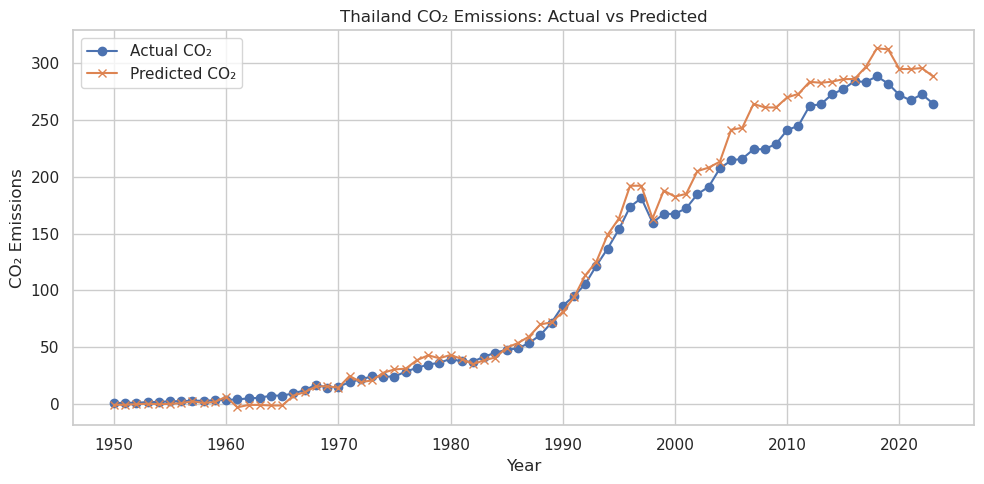

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test_df['year'], y_test_real, label="Actual CO₂", marker='o')
plt.plot(test_df['year'], y_test_pred_real, label="Predicted CO₂", marker='x')
plt.title("Thailand CO₂ Emissions: Actual vs Predicted")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
new_data = pd.DataFrame([{
    'population': 71702438,
    'gdp': 1124143726592,
    'primary_energy_consumption': 1390.812,
    'oil_co2': 104.343,
    'coal_co2': 59.327,
    'total_ghg': 416.852,
    'co2_including_luc': 297.369,
    'temperature_change_from_ghg': 0.015
}])


new_data_scaled = feature_scaler.transform(new_data[feature_cols])

pred_scaled = xgb_model.predict(new_data_scaled)

pred_real = target_scaler.inverse_transform(pred_scaled.reshape(-1, 1))

print(f"Predicted CO₂ for Thailand in 2027: {pred_real[0][0]:,.2f}")

Predicted CO₂ for Thailand in 2027: 288.22
